In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("../results/eurosat_size_vs_performance.csv")

In [13]:
df.head()

,model,preprocess_method,rgb,size,acc,acc_scaled
0,resnet50_pretrained_seco,divide,True,32,0.491667,0.524630
1,resnet50_pretrained_seco,divide,True,48,0.485370,0.483333
2,resnet50_pretrained_seco,divide,True,64,0.480185,0.490185
3,resnet50_pretrained_seco,divide,True,80,0.482222,0.481852
4,resnet50_pretrained_seco,divide,True,96,0.483889,0.493148


In [14]:
sizes = sorted(df["size"].unique())

In [15]:
model_names = df["model"].unique()

Resnet50 Pretrained Imagenet (All bands)
Resnet50 Pretrained Moco (All bands)
Resnet50 Randominit (All bands)
Resnet50 Pretrained Imagenet (RGB)
Resnet50 Pretrained Moco (RGB)
Resnet50 Pretrained Seco (RGB)
Resnet50 Randominit (RGB)


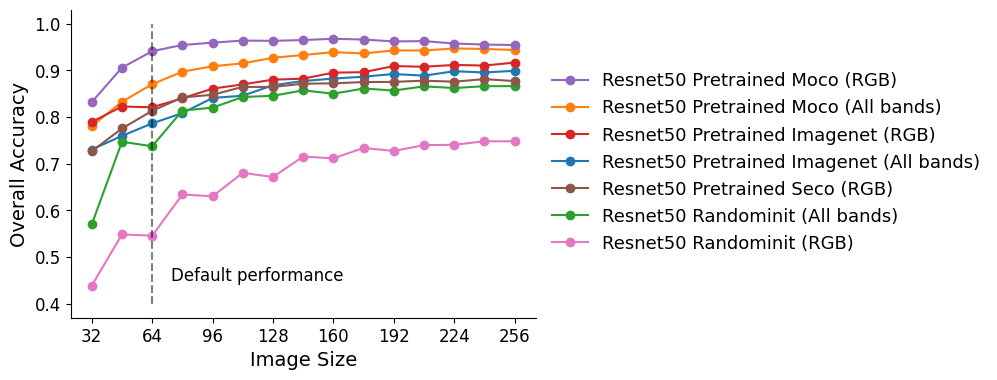

In [17]:
plt.figure(figsize=(6, 4))

last_accs = []
for (rgb, model_name), group in df.groupby(["rgb", "model"]):
    ys = []
    sub_group = group[group["size"] == sizes[-1]].copy()
    sub_group["best_acc"] = sub_group[["acc", "acc_scaled"]].max(axis=1)
    best_row = sub_group.iloc[sub_group["best_acc"].argmax()]
    preprocess_method = best_row["preprocess_method"]
    scaling_is_better = best_row["acc_scaled"] > best_row["acc"]
    sub_group = group[group["preprocess_method"] == preprocess_method]
    for size in sizes:
        row = sub_group[sub_group["size"] == size]
        assert row.shape[0] == 1
        row = row.iloc[0]
        if scaling_is_better:
            ys.append(row["acc_scaled"])
        else:
            ys.append(row["acc"])

    name = model_name.replace("_", " ").title()# + f" ({preprocess_method.title()})"
    if rgb:
        name += " (RGB)"
    else:
        name += " (All bands)"
    print(name)
    plt.plot(sizes, ys, marker="o", label=name)
    last_accs.append(ys[-1])

# add default performance line
plt.vlines(64, 0.4, 1.0, linestyle="--", color="black", alpha=0.5)
plt.annotate(f"Default performance", (64, 0.5), xytext=(64 + 10, 0.45), fontsize=12)

# remove right and top spines
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# xticks multiples of 32
plt.xticks(np.arange(32, 256 + 1, 32), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Overall Accuracy", fontsize=14)
plt.xlabel("Image Size", fontsize=14)

# add legend off right side
# sort legend by order of performance
handles, labels = ax.get_legend_handles_labels()
order = np.argsort(last_accs)[::-1]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
plt.legend(
    handles,
    labels,
    bbox_to_anchor=(1.0, 0.85),
    loc="upper left",
    fontsize=13,
    frameon=False,
)

plt.show()
plt.close()